<a href="https://colab.research.google.com/github/ozeiasgodoy/notebooks/blob/main/Sklearn_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os

import matplotlib.pyplot as plt


In [2]:
#cria o diretorio
os.makedirs('./housing', exist_ok=True)

In [3]:
#download do zip com o csv
url = "https://github.com/ozeiasgodoy/notebooks/blob/main/dados/housing.zip?raw=true"

filebytes = BytesIO(
    requests.get(url).content
)

In [4]:
#extração do arquivo
myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./housing")

In [5]:
#Carregando o arquivo extraido para um dataframe
housing = pd.read_csv('/content/housing/housing.csv')

In [6]:
#apresentando as cinco primeiras linhas do dataframe
#Nesse dataframe, cada linha representa um bairro
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#Verificando as caracteristicas do dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#verificanfo o resumo dos atributos numericos
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


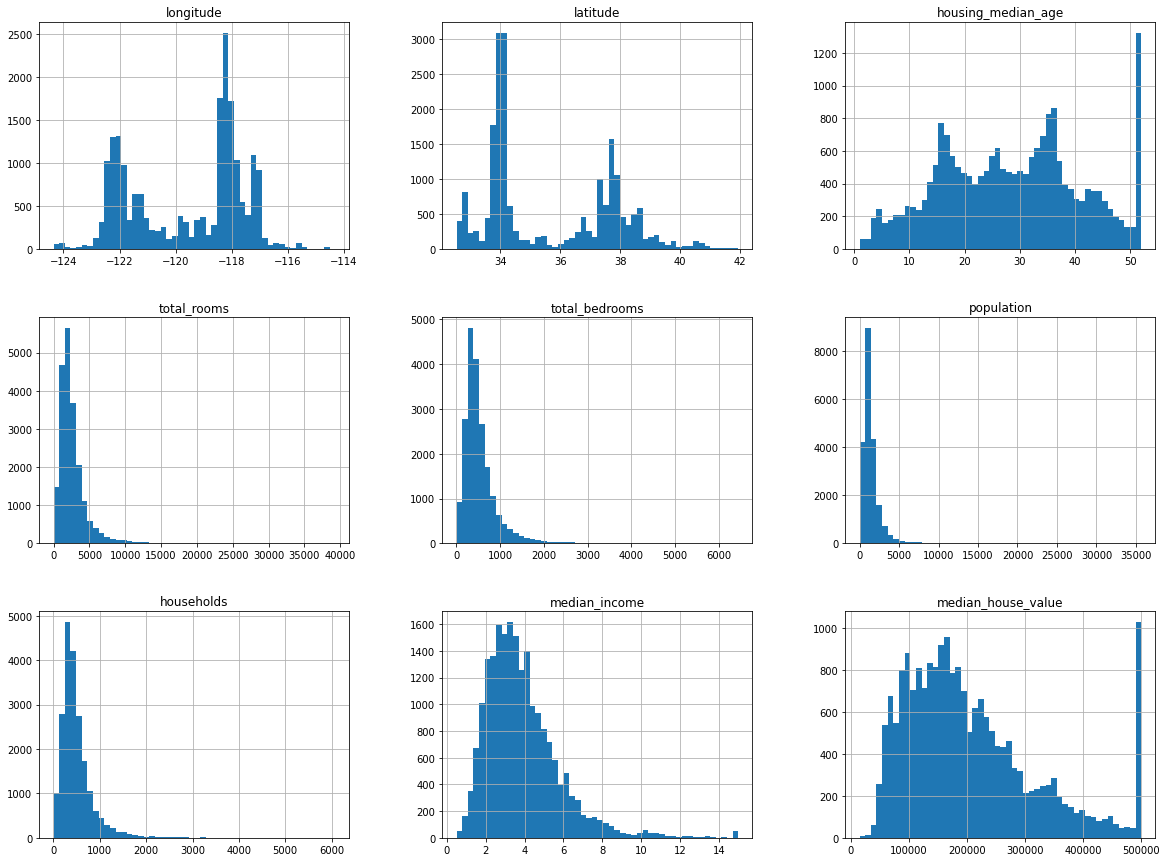

In [9]:
#Histograma dos atributos numericos
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Explorando os dados

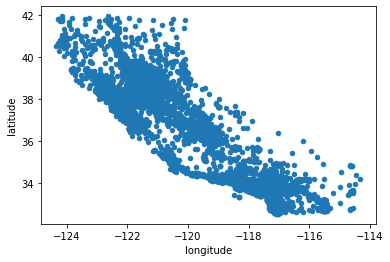

In [10]:
#Com dados de latitute e longitude(dados geograficos), podemos criar um grafico de dispersão para visualizar os dados de todos os bairros
housing.plot(kind="scatter", x='longitude', y='latitude')

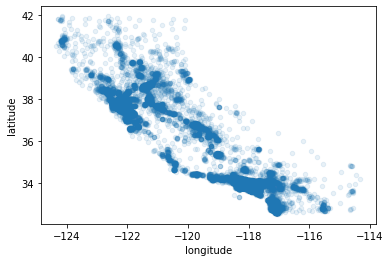

In [11]:
#Se adicionarmos o parametro alpha, podemos visualizar pontos com alta densidade de dados
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.1)

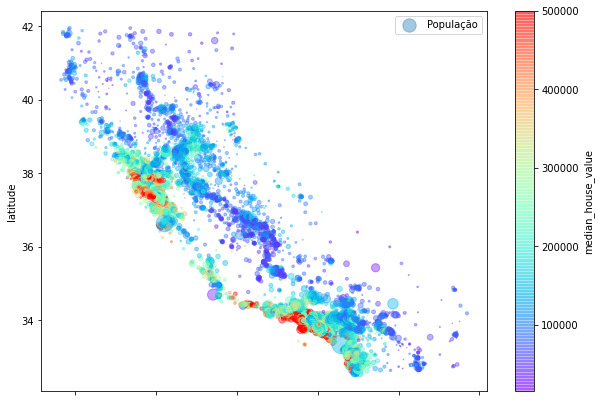

In [12]:
#Veremos agora os precos
#O raio("tamanho") de cada circulo, representa a população do bairro : parametro s
#A cor, representa o preco: parametro c
#Usaremos a paleta de cor rainbom, com valores mais baixo em azul e valor mais altos em vermelho: parametro cmap

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="População", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("rainbow"), colorbar=True,),
plt.legend()

# Plotando as informações no mapa

In [13]:

#download do zip com o csv
url = "https://github.com/ozeiasgodoy/notebooks/blob/main/dados/countyl010g_shp_nt00964.zip?raw=true"

filebytes = BytesIO(
    requests.get(url).content
)
#extração do zip
myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./housing")

In [14]:
#instalando a biblioteca para trabalhar com o mapa
!pip install cartopy

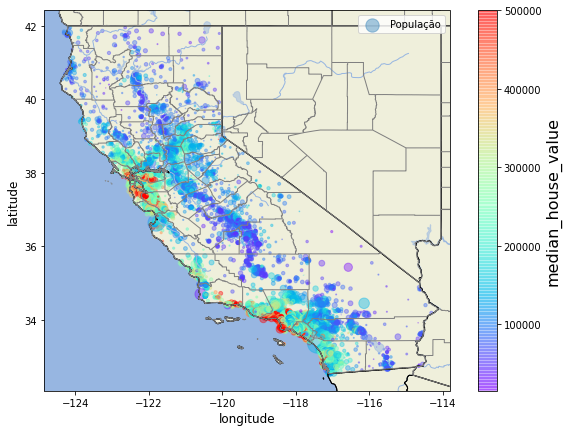

In [15]:
#importando as bibliotecas
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))

# Criando o mapa
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle=':')
ca_map.add_feature(cfeature.LAKES, alpha=0.5)
ca_map.add_feature(cfeature.RIVERS)
ca_map.add_feature(cfeature.STATES.with_scale('10m'))

# Adicionando as linhas das cidades
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader('/content/housing/countyl010g.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())
ca_map.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ca_map.xaxis.set_visible(True)
ca_map.yaxis.set_visible(True)

# Plotando os valores no mapa
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, 
            s=housing["population"]/100, label="População",
            c=housing['median_house_value'], 
            cmap=plt.get_cmap("rainbow"), 
            transform=ccrs.PlateCarree())

prices = housing["median_house_value"]
cbar = plt.colorbar()
cbar.set_label('median_house_value', fontsize=16)


# Adicionando os labels de x e y
plt.ylabel("latitude", fontsize=12)
plt.xlabel("longitude", fontsize=12)
plt.legend()



In [16]:
#É possivel identificar uma relação dos porecos com a localização(proximo ao mar, por exemplo) e a densidade populacional

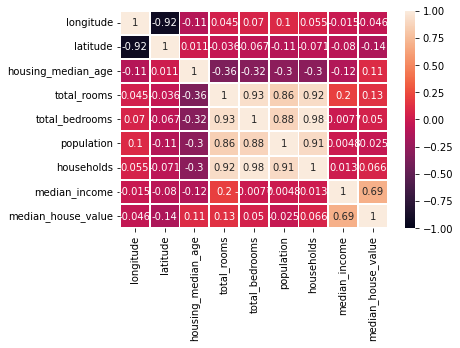

In [17]:
import seaborn as sns

sns.heatmap(housing.corr(), annot=True, vmin=-1, vmax=1, linewidths=.9);

In [18]:
#uma outra forma de analisar a correlação
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3686a38ed0>,
      dtype=object)

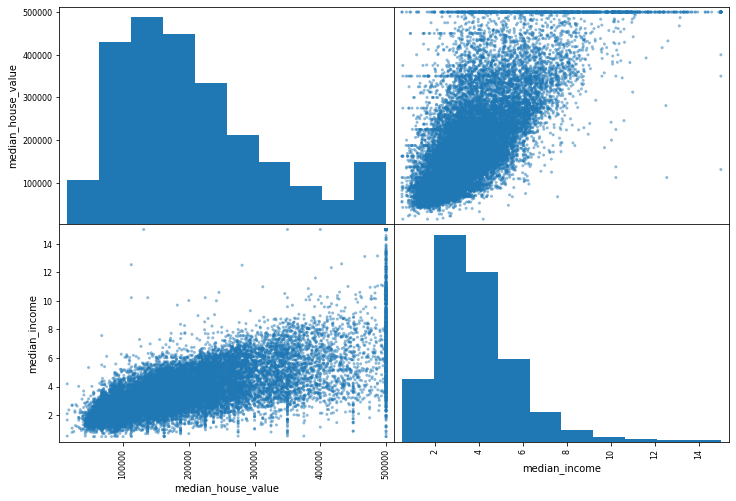

In [19]:
#mais outra forma 
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income']
scatter_matrix(housing[attributes], figsize=(12, 8))

# Criandos novos atributos

In [20]:
#numero de comodos por domicilio
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

#numero de comodos
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

#população por domicilio
housing['population_per_household'] = housing['population']/housing['households']

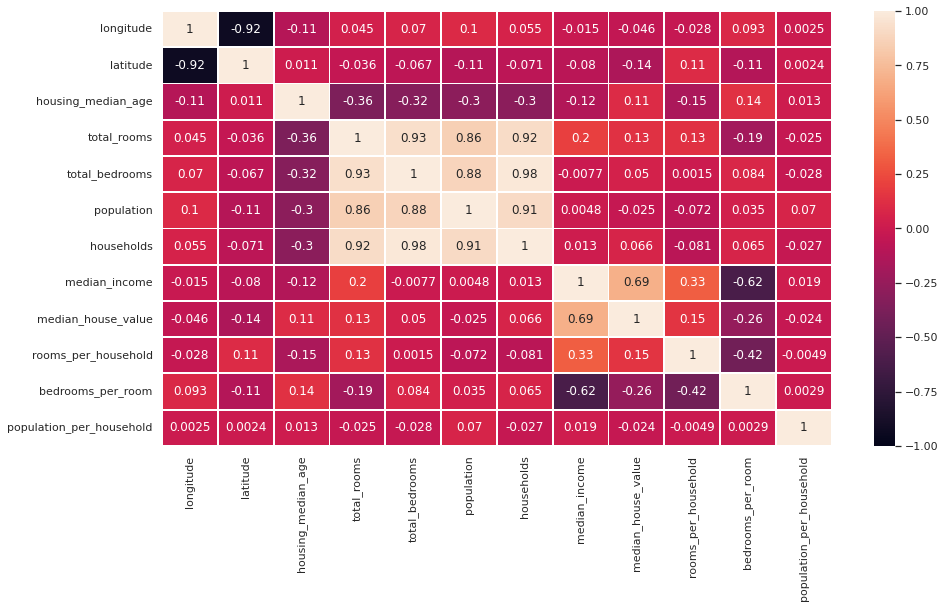

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(housing.corr(), annot=True, vmin=-1, vmax=1, linewidths=.9);

In [22]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Preparando os dados para os algoritmos de aprendizado de maquina

---



In [23]:
#Tratando dados faltantes
housing.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [24]:
#Iremos preencher os campos nulos das colunas, com suas respectivas medias
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
housing['bedrooms_per_room'] =housing['bedrooms_per_room'].fillna(housing['bedrooms_per_room'].mean())


In [25]:
housing[['total_bedrooms', 'bedrooms_per_room']]

,total_bedrooms,bedrooms_per_room
0,129.0,0.146591
1,1106.0,0.155797
2,190.0,0.129516
3,235.0,0.184458
4,280.0,0.172096
...,...,...
20635,374.0,0.224625
20636,150.0,0.215208
20637,485.0,0.215173
20638,409.0,0.219892


In [26]:
housing.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [27]:
#Vamos aplica um "One Ho Encoding na coluna ocean_proximity"
housing  = pd.get_dummies(housing, columns=['ocean_proximity'])
#housing

In [28]:
#Vamos normalizar os dados
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [29]:
min_max_scaler.fit(housing)

MinMaxScaler()

In [30]:
housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',	'total_bedrooms', 'population',
         'households', 	'median_income', 'rooms_per_household','bedrooms_per_room',
         'population_per_household']] = min_max_scaler.fit_transform(
             housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',	'total_bedrooms', 'population',
            'households', 	'median_income', 'rooms_per_household','bedrooms_per_room','population_per_household']]
         )

In [31]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0.043512,0.051768,0.001499,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0.038224,0.061996,0.001141,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0.052756,0.032796,0.001698,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0.035241,0.093843,0.001493,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0.038534,0.080107,0.001198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,78100.0,0.029769,0.138472,0.001503,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,77100.0,0.037344,0.128009,0.001956,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,92300.0,0.030904,0.127970,0.001314,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,84700.0,0.031783,0.133214,0.001152,0,1,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score

x = housing["median_house_value"]
housing_new = housing.drop(["median_house_value"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(housing_new, x, test_size=0.3, random_state=42)




In [33]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#Cria o modelo Regressão linear
reg_linear = LinearRegression()

#treina o modelo
reg_linear.fit(X_train, y_train)

#Realiza as previsões
y_pred = reg_linear.predict(X_test)

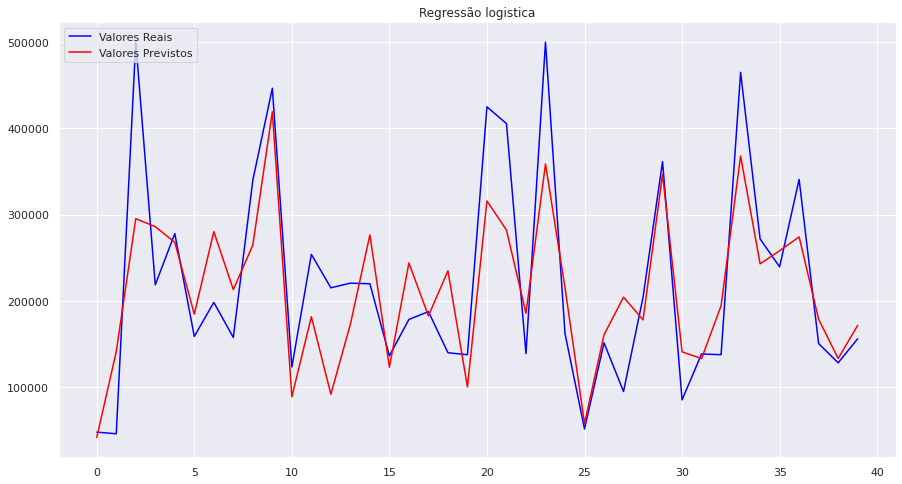

In [35]:
#IMPORTANTE!!!
#A acurracia de um modelo não é medida dessa forma

#O plot é apenas uma forma, mais didatica de demonstrar as previsões
#Inclusive estamo usando somente os primiros 40 valores
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("Regressão logistica")

plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

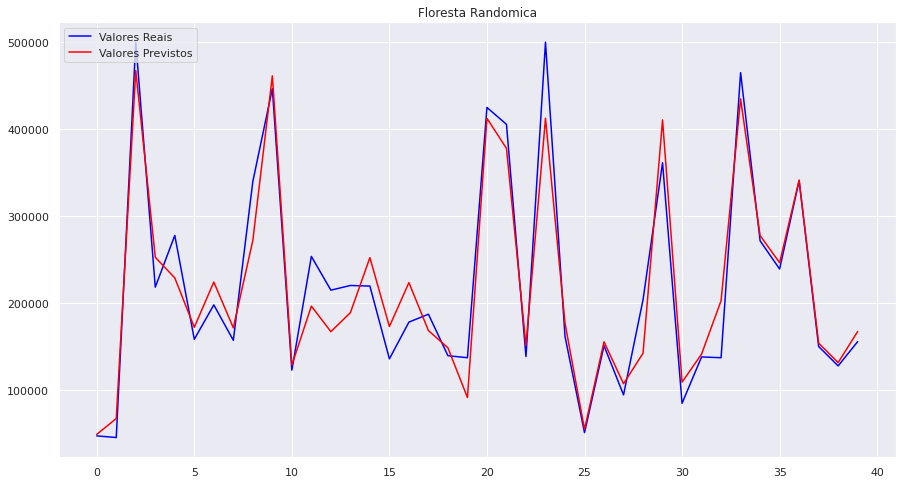

In [37]:
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("Floresta Randomica")

plt.show()

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

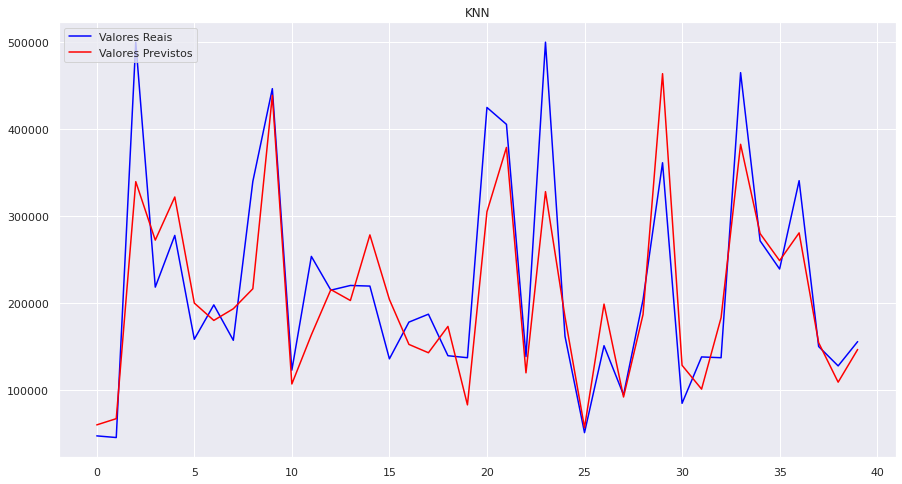

In [39]:
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("KNN")

plt.show()

In [40]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

NameError: ignored

In [ ]:
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("Arvore de decisão")

plt.show()